<h2>Questions to answer:</h2>
    <p>What features affect the price of insurance?</p>
    <p>What features have more impact on the price of insurance?</p>
    <p>Is there difference in price for men and women?</p>
    <p>Does age impact the price of insurance?</p>
    <p>Any other question that pops up during EDA.</p>
<h4>Goal:</h4>
    <p>To predict what will be the price of insurance for given individual.</p>
<h5>Purpose:</h5>
<p>To automate and ease the process of calculating insurance charges for insurance companies.</p>
    

In [1]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import kaleido

<h4>Load the Data<h4>

In [2]:
data = pd.read_csv("DATA\\insurance.csv")

Let's take a look at what our data looks like

In [3]:
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
1254,34,female,27.720,0,no,southeast,4415.15880
1191,41,female,21.755,1,no,northeast,13725.47184
397,21,male,31.020,0,no,southeast,16586.49771
718,51,female,36.670,2,no,northwest,10848.13430
1286,28,female,17.290,0,no,northeast,3732.62510


<h5>We have 7 features:</h5>

    age: age of primary beneficiary

    sex: insurance contractor gender, female, male

    bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
    objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

    children: Number of children covered by health insurance / Number of dependents

    smoker: Smoking

    region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    charges: Individual medical costs billed by health insurance
<h5>We have one interesting feature,which is BMI. It's interesting,because we can either leave it as numeric value or we could make it categorical, by referring to American Cancer Society, which tells us we can have 4 ranges for BMI: Underweight, Normal Weight, Overweight and Obese. We will think about doing it after Exploratory Data Analysis.</h5>
<h6>Note: BMI Index is the same for adult males and adult females</h6>

In [4]:
# Checking for missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Looks like we don't have missing values. Now let's graph the dataset for visual exploration.

In [5]:
# First we will start with basic describe method
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


From this we can get an idea of what kind of numbers we are dealing with and just general overview of the dataset.


<AxesSubplot:>

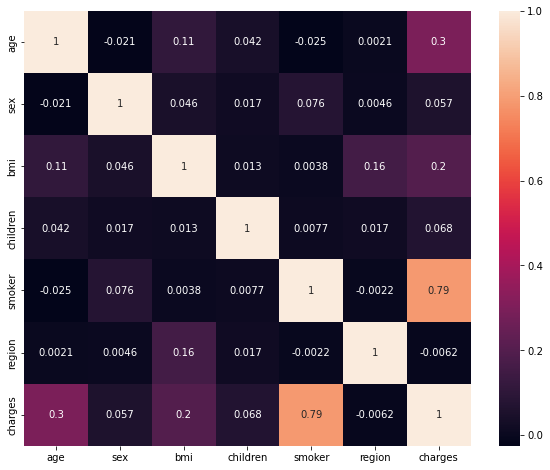

In [6]:
# Now let's visualize dataset with a heatmap

# **** Encoding Categorical Data For Heatmap ****
from sklearn.preprocessing import LabelEncoder
data_encoded = data.copy()
le = LabelEncoder()
le.fit(data_encoded.sex.drop_duplicates()) 
data_encoded.sex = le.transform(data_encoded.sex)
le.fit(data_encoded.smoker.drop_duplicates()) 
data_encoded.smoker = le.transform(data_encoded.smoker)
le.fit(data_encoded.region.drop_duplicates()) 
data_encoded.region = le.transform(data_encoded.region)
# *************************************************

plt.figure(figsize=(10,8))
sns.heatmap(data=data_encoded.select_dtypes(include=[np.number]).corr(),annot=True)


<h6>Instantly, smoking is hugely correlated with a price of insurance. Also, as we can see we have some positive correlation between age and charges,as well as bmi and charges. This means as either of the values rises,the other one will rise as well. At a first glance, sex doesn't really impact the charges. Let's look at the pairplot.</h6>
<p>Note: in the pairplot 0 in smoker represents "Not a smoker" and 1 represents "Is a smoker".</p>

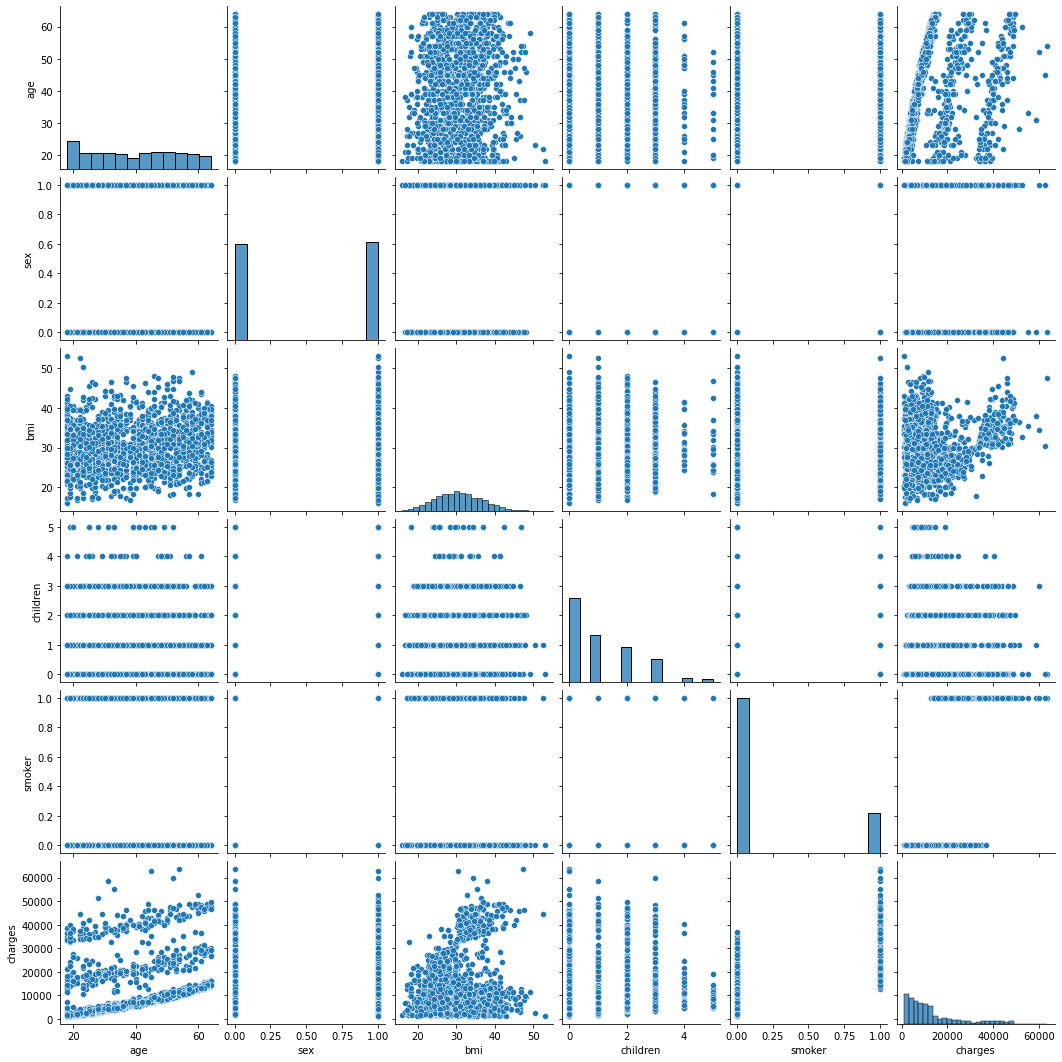

In [7]:
sns.pairplot(data=data_encoded.drop("region", axis=1))

<p>Just as a confirmation, we can see that for lower BMI scores charges are lower and around BMI = 30 charges start to become higher. This is probably due to BMI Index around 30 meaning obesity.</p>
<p>Also, we can see prices tilting to the right as age increases.</p>
<p>As expected, charges for smokers are much bigger on average.</p>
<p>Also, from this pairplot we can see that the number of children covered by insurance doesn't really impact the price, although we can see starting from 4 children - prices do go down, but I suppose we don't have much people here with more than 3 children, so we can't really explore impact of this feature due to lack of data.</p>

Text(0.5, 1.0, 'BMI < 30')

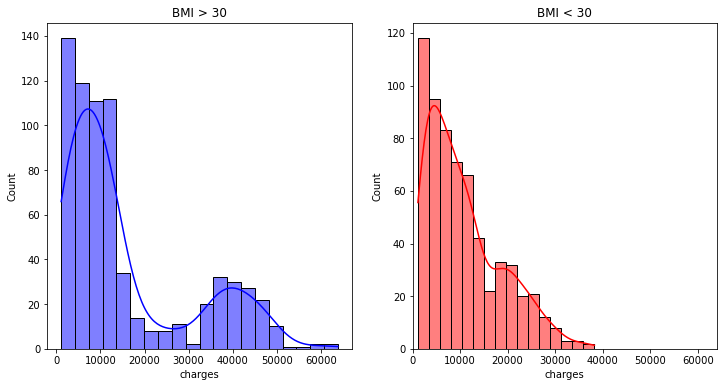

In [68]:
fig, axis = plt.subplots(1, 2, figsize=(12,6))
plt.xlim(0,64000)
sns.histplot(data[(data.bmi > 30)]["charges"], color='b', kde=True, ax = axis[0])
axis[0].set_title("BMI > 30")
sns.histplot(data[(data.bmi < 30)]["charges"], color='r', kde=True, ax = axis[1])
axis[1].set_title("BMI < 30")

BMI does show noticable impact on the insurance charges. Now let's quickly compare average prices for men and women.

<AxesSubplot:xlabel='sex', ylabel='charges'>

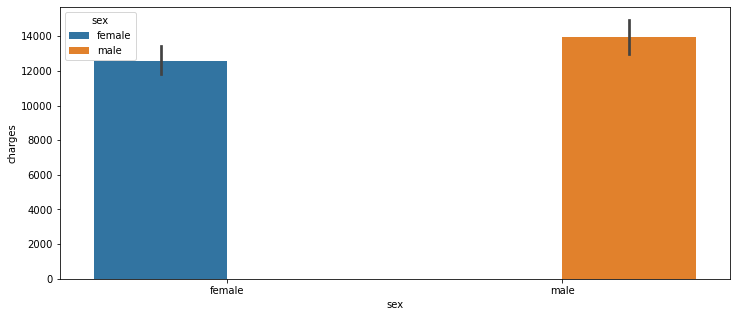

In [52]:
plt.figure(figsize=(12,5))
sns.barplot(data=data, y="charges", x="sex", hue="sex")

It looks like men do pay on average a little bit higher than women.

<h5>Now let's plot the distribution of charges</h5>

<AxesSubplot:xlabel='charges', ylabel='Count'>

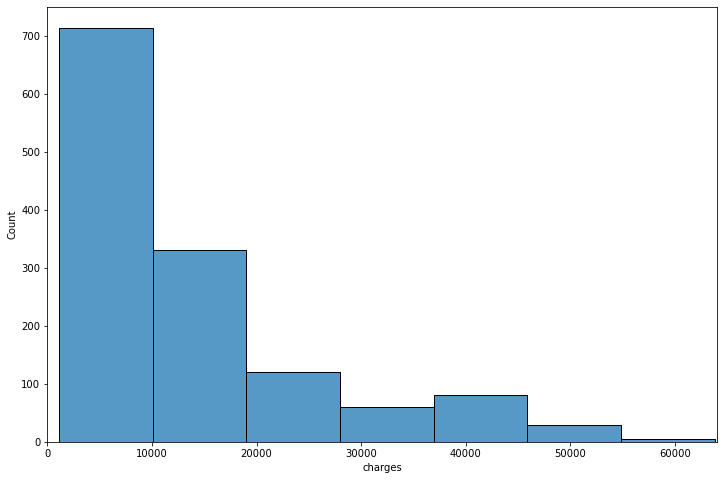

In [8]:
plt.figure(figsize=(12,8))
plt.xlim(0,64000)
sns.histplot(data=data, x="charges", bins=7)

<AxesSubplot:xlabel='charges', ylabel='Count'>

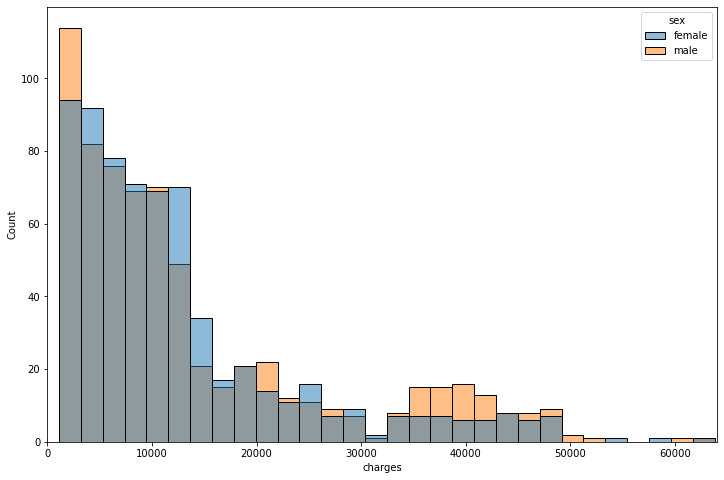

In [9]:
plt.figure(figsize=(12,8))
plt.xlim(0,64000)
sns.histplot(data=data, x="charges", hue="sex")

<h5>So, most of the insurance prices lie in the pre 30000 dollars with the majority lying under 15000 mark. Also, I can't really see any strong correlation between prices for men and women, but men tend to pay extreme prices more often.</h5>
<p> Now let's see the same distribution but for smokers vs non-smokers </p>

<AxesSubplot:xlabel='charges', ylabel='Count'>

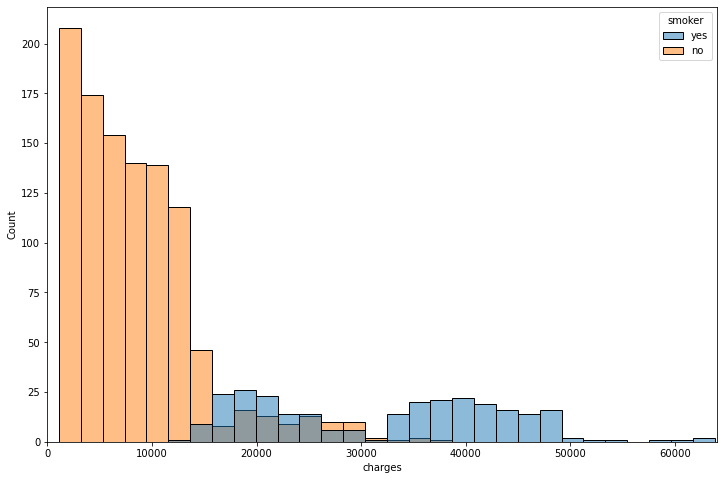

In [10]:
plt.figure(figsize=(12,8))
plt.xlim(0,64000)
sns.histplot(data=data, x="charges", hue="smoker")

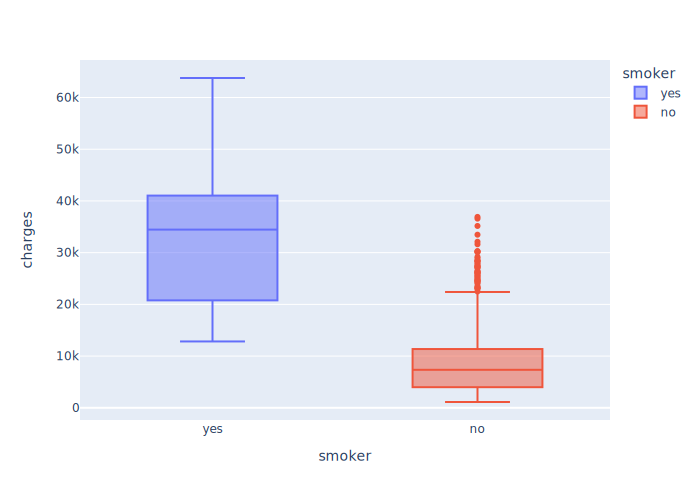

In [17]:
fig = px.box(data_frame=data, x="smoker", y="charges", color="smoker")
fig.show("svg")

<h5>This is a very strong correlation between prices of insurance and being a smoker. As we can see, median price for non-smokers is around 7000 dollars and 34450$ for those who smoke.</h5>
<p> Something I want to explore is how much smokers there are between men and women </p>

<AxesSubplot:xlabel='sex', ylabel='Count'>

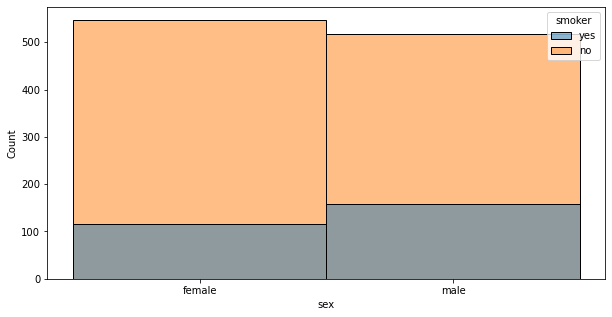

In [54]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x="sex", hue="smoker")

As I was expecting, men are smokers more often than women, but the difference is not astounding. Although it could ones again contribute to the average price difference we saw earlier.

<AxesSubplot:title={'center':'Average Charges Between Non-Smokers'}, xlabel='sex', ylabel='charges'>

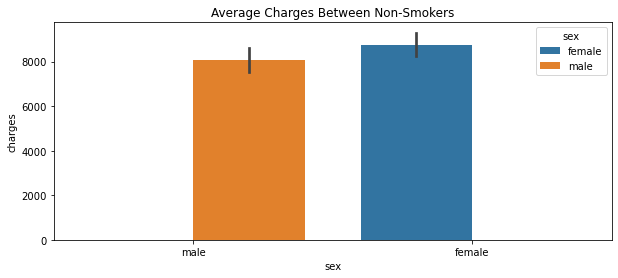

In [16]:
fig = plt.figure(figsize=(10,4))
plt.title("Average Charges Between Non-Smokers")
sns.barplot(data=data, y="charges", x=data[(data.smoker == "no")]["sex"], hue="sex")

Here we can see something interesting - between non-smokers, female on average actually pay more than men.

<h5> Let's quickly look once more on how prices go up with age. </h5>

<AxesSubplot:xlabel='charges', ylabel='age'>

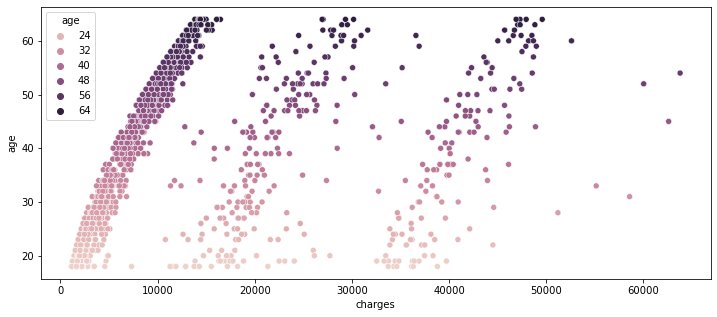

In [12]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=data, x="charges", y="age", hue="age")

This is a coloured plot from the pairplot. Here we can more distinctly see how age impacts charges.

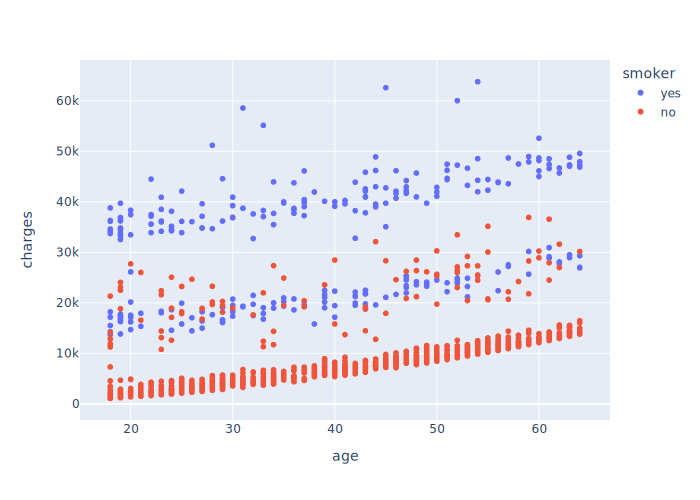

In [15]:
fig = px.scatter(data_frame=data, x="age", y="charges", color="smoker")
fig.show("svg")

<h5> Lastly I want to explore if region has anything to do with the price of insurance </h5>

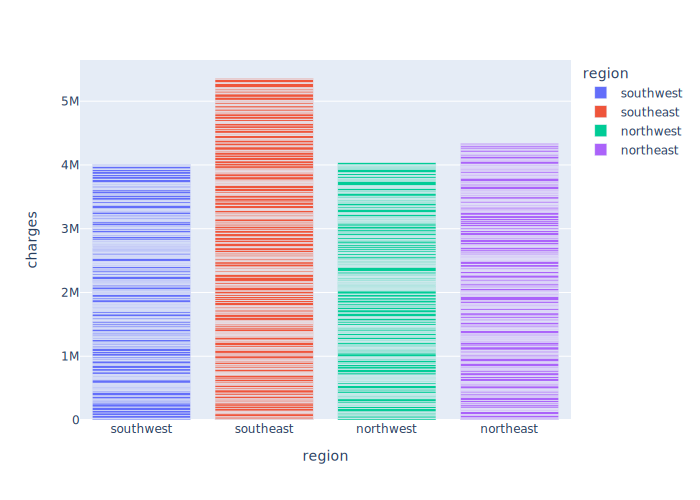

In [14]:
fig = px.bar(data_frame=data, y="charges", x="region", color="region")
fig.show("svg")

It looks like the region does indeed impact the charges. Now let's look at the same barplot but for men and women.

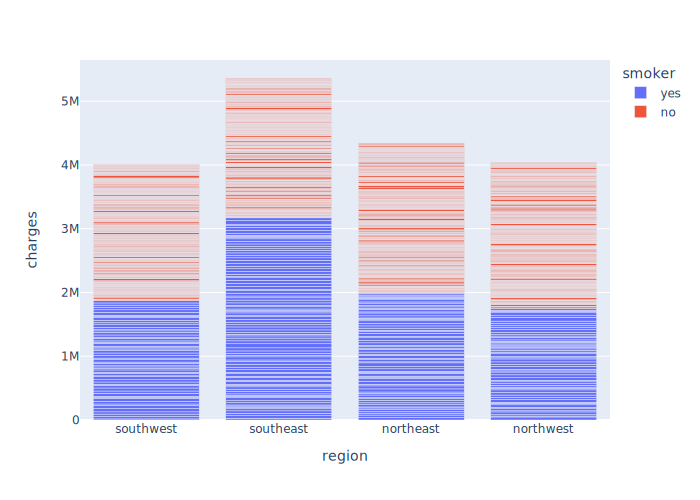

In [13]:
fig = px.bar(data_frame=data, y="charges", x="region", color="smoker")
fig.show("svg")

It seems like all regions are almost equal, though in Southeast prices are noticably higher than in any other region.

<AxesSubplot:xlabel='region', ylabel='Count'>

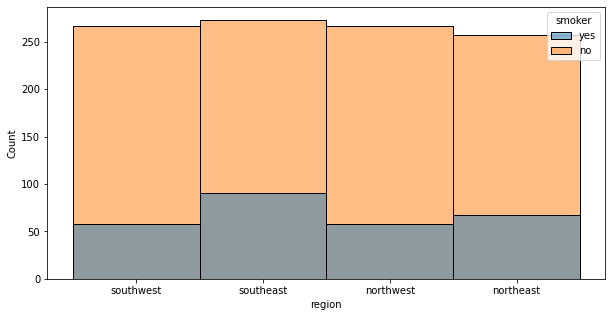

In [55]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x="region", hue="smoker")

Seems like there are more smokers in southeast, probably one of the reasons why people pay for insurance more there.

<h3>Conclusion</h3>
<p>It looks like every feature has smaller or bigger impact on the charges, with Smoker feature being the most impactful.</p>
<p>There is some difference in average prices for men and women. It seems to be the case that men smoke more often than women and I would imagine they take on more dangerous jobs more often, so the graphs did show men paying more on average. Although, it looked like between non-smokers, women actually pay more than men. My thought is that sex feature will be not that important to a model, because we have a smoker feature which probably drives this differences.</p>
<p>Answering the question of whether age impacts price of insurance, we can definitely say that there is a correlation. Insurance charges tend to go up as you get older.</p>
<h5>Additional takeaways</h5>
<p>People with BMI bigger than 30 tend to pay extreme insurance charges more often. This is probably tied with BMI 30 indicating obesity.</p>
<p>Seems like people with 4 or more children also pay less for insurance, although we don't have enough data to really explore it.</p>
<p>Looks like in the Southeast region there are a lot more smokers than in any other region, so the graphs showed that people paid the most for insurance there.</p>

<h2> Data preprocessing</h2>

After EDA I decided to leave BMI as it is because it has shown impact on the charges the way it already is. 
<h5>Dealing with Categorical Variables.</h5>

In [16]:
data.select_dtypes(include=(object)).columns

Index(['sex', 'smoker', 'region'], dtype='object')

Creating dummy variables for categorical features.

In [17]:
dummies = pd.get_dummies(data[['sex', 'smoker','region']], drop_first=True)
data = pd.concat([data.drop(['sex', 'smoker','region'],axis=1),dummies],axis=1)

Removing extreme outliers.(The model actually showed better results without this procedure)

In [18]:
#data = (data[(data['charges'] >= data['charges'].quantile(0.001))&
#           (data['charges'] <= data['charges'].quantile(0.999))])

Let's look how dataset looks now.

In [19]:
data.sample(3)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
643,23,34.96,3,4466.6214,0,0,1,0,0
328,64,33.80,1,47928.0300,0,1,0,0,1
620,30,31.40,1,3659.3460,1,0,0,0,1


Now let's Train Test Split.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = data.drop('charges',axis=1)
y = data['charges']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Now let's scale our data.

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h2> Model Creation </h2>

For model I will be using XGBoost which is an optimized distributed gradient boosting library. It seems to give very good results across the board and has huge popularity on Kaggle for its effectiveness.

In [26]:
from xgboost import XGBRegressor

C:\Users\suo\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [27]:
#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
model = XGBRegressor()

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
#=========================================================================
# search for the optimal hyperparameters
#=========================================================================
param_grid = {"max_depth":    [1, 2, 3, 4, 5, 6, 7, 8],
              "n_estimators": [100, 200, 300 ,400 ,500, 600, 700],
              "learning_rate": [0.01, 0.015, 0.02, 0.025,0.05]}

In [30]:
search = GridSearchCV(model, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [31]:
# Create the Model with best hyperparameters
model = XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                     n_estimators  = search.best_params_["n_estimators"],
                     max_depth     = search.best_params_["max_depth"])

Fitting the model:

In [32]:
model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:17003.62695
[1]	validation_0-rmse:16234.26953
[2]	validation_0-rmse:15505.86719
[3]	validation_0-rmse:14816.61133
[4]	validation_0-rmse:14160.16602
[5]	validation_0-rmse:13539.01758
[6]	validation_0-rmse:12954.00098
[7]	validation_0-rmse:12398.94727
[8]	validation_0-rmse:11878.96875
[9]	validation_0-rmse:11388.51269
[10]	validation_0-rmse:10927.01856
[11]	validation_0-rmse:10482.07227
[12]	validation_0-rmse:10066.11035
[13]	validation_0-rmse:9679.43945
[14]	validation_0-rmse:9305.69336
[15]	validation_0-rmse:8962.66211
[16]	validation_0-rmse:8638.75879
[17]	validation_0-rmse:8337.03711
[18]	validation_0-rmse:8045.71191
[19]	validation_0-rmse:7781.34424
[20]	validation_0-rmse:7531.30713
[21]	validation_0-rmse:7300.73242
[22]	validation_0-rmse:7080.87158
[23]	validation_0-rmse:6872.65283
[24]	validation_0-rmse:6685.14307
[25]	validation_0-rmse:6508.93555
[26]	validation_0-rmse:6342.64453
[27]	validation_0-rmse:6193.68701
[28]	validation_0-rmse:6050.42725
[29]	valida

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Now let's use the model to predict on a test data and evaluate perfomance.

In [33]:
from sklearn.metrics import r2_score, mean_squared_error

In [34]:
predictions = model.predict(X_test)

In [35]:
pred_vs_actual = pd.DataFrame({"Actual": y_test, "Predicted": predictions})

In [36]:
pred_vs_actual.sample(7)

,Actual,Predicted
169,4827.90495,7545.030273
53,37742.57570,38990.812500
951,47462.89400,45698.632812
862,12269.68865,14273.156250
131,13616.35860,13944.044922
650,9800.88820,11011.342773
223,34779.61500,35366.277344


Calculating r2 score. The r2 score varies between 0 and 100%, 100 being the two variable are perfectly correlated with no variance at all, while 0 being totally uncorrelated.

In [37]:
print('R2 test data: %.3f' % r2_score(y_test,predictions))

R2 test data: 0.863


86% correlation between actual data points and our predictions. Not bad. Now let's calculate MSE and RMSE.

In [38]:
print('MSE test data: %.3f, RMSE test data: %.3f' % (
mean_squared_error(y_test, predictions),
np.sqrt(mean_squared_error(y_test,predictions))))

MSE test data: 19356467.534, RMSE test data: 4399.599


Plotting the actual insurance charges vs predicted charges.

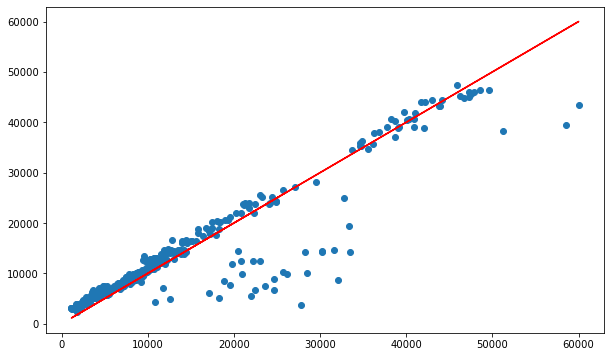

In [39]:
plt.figure(figsize=(10,6))

# Perfect Predictions
plt.plot(y_test, y_test, "r")

# Our Predictions
plt.scatter(y_test, predictions)

<h3>And... that's it. We were able to build a solid model, although it's my first time using XGBoost and doing project alone without any guidance like in course exercises. Thank you for reading.</h3>

Saving model for deployment

In [40]:
import pickle

filename = "trained_model.pkl"
pickle.dump(model, open(filename, "wb"))

Saving scaler

In [41]:
filename = "trained_scaler.pkl"
pickle.dump(scaler, open(filename, "wb"))